# MultiLabel-Multiple Class Classification

In [1]:
#Import all required packages

import io
import pickle
import numpy as np 
import pandas as pd


from sklearn.metrics import recall_score,confusion_matrix,accuracy_score 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [2]:
#Read the datasets

import pandas as pd

df = pd.read_csv(r'Book3_Updated.csv')
df

,temperature,humidity,ph,rainfall,N,P,K,Fertiliser,Soil,Crop
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5,DAP and MOP,Clayey,rice
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2,Diammonium phosphate (DAP),Clayey,rice
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0,Good NPK,laterite,Coconut
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0,MOP,silty clay,rice
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5,Urea and DAP,sandy,Coconut
...,...,...,...,...,...,...,...,...,...,...
195,24.635449,80.413630,7.730368,253.720278,2.5,4.0,2.0,Urea and MOP,silty clay,rice
196,20.083696,83.291147,5.739175,263.637218,2.5,4.0,2.0,Urea and MOP,Clayey,rice
197,23.446768,84.793524,6.215110,283.933847,2.5,4.0,2.0,Urea and MOP,silty clay,rice
198,26.800796,80.886848,5.108682,284.436457,2.5,4.0,2.0,Urea and MOP,Clayey,rice


In [3]:
import pandas as pd
df2 = pd.read_csv(r'Book3_Updated_Soil.csv')
df2

,temperature,humidity,ph,rainfall,N,P,K,Fertiliser,Soil,Crop
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5,DAP and MOP,Clayey,rice
1,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0,Good NPK,laterite,Coconut
2,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0,MOP,silty clay,rice
3,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5,Urea and DAP,sandy,Coconut
4,25.035124,95.897400,6.182233,174.796583,2.0,3.9,2.1,Urea and MOP,coastal,Coconut
...,...,...,...,...,...,...,...,...,...,...
195,23.579436,83.587603,5.853932,291.298662,4.0,2.0,3.0,Diammonium phosphate (DAP),silty clay,rice
196,25.655535,83.470211,7.120273,217.378858,2.0,3.9,2.1,Urea and MOP,Clayey,rice
197,24.172988,83.728757,5.583370,257.034355,2.0,2.1,3.5,Urea and DAP,silty clay,rice
198,26.229169,83.836258,5.543360,286.508373,4.2,2.3,3.2,Diammonium phosphate (DAP),silty clay,rice


Label Encoding and create a couple of dictionaries for future use
Fertiliser And Crop

In [4]:
from io import StringIO
col = ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K', 'Fertiliser ','Soil','Crop']
df = df[col]


df = df[pd.notnull(df['temperature'])]

df.columns = ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K', 'Fertiliser ','Soil','Crop']


df['encode_id'] = df['Fertiliser '].factorize()[0]

df['crop_id'] = df['Crop'].factorize()[0]

category_id_df = df[['Fertiliser ', 'encode_id']].drop_duplicates().sort_values('encode_id')

crop_id_df = df[['Crop', 'crop_id']].drop_duplicates().sort_values('crop_id')

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['encode_id', 'Fertiliser ']].values)



crop_to_id = dict(crop_id_df.values)
id_to_crop = dict(crop_id_df[['crop_id', 'Crop']].values)

df.tail(10)

,temperature,humidity,ph,rainfall,N,P,K,Fertiliser,Soil,Crop,encode_id,crop_id
190,24.443455,82.454326,5.950648,267.976195,2.5,2.0,3.0,Urea and DAP,Clayey,rice,4,0
191,24.515881,83.535216,6.685346,230.446236,2.5,4.0,2.0,Urea and MOP,Clayey,rice,5,0
192,21.446540,84.943760,5.824709,272.201720,2.5,2.0,3.0,Urea and DAP,silty clay,rice,4,0
193,20.775761,84.497744,6.244841,240.081065,2.5,4.0,2.0,Urea and MOP,silty clay,rice,5,0
194,21.019447,82.952217,7.416245,298.401847,2.5,2.0,3.0,Urea and DAP,silty clay,rice,4,0
195,24.635449,80.413630,7.730368,253.720278,2.5,4.0,2.0,Urea and MOP,silty clay,rice,5,0
196,20.083696,83.291147,5.739175,263.637218,2.5,4.0,2.0,Urea and MOP,Clayey,rice,5,0
197,23.446768,84.793524,6.215110,283.933847,2.5,4.0,2.0,Urea and MOP,silty clay,rice,5,0
198,26.800796,80.886848,5.108682,284.436457,2.5,4.0,2.0,Urea and MOP,Clayey,rice,5,0
199,23.830675,84.813601,6.271479,298.560117,2.5,4.0,2.0,Urea and MOP,silty clay,rice,5,0


In [5]:
X1=df2.iloc[:,:-3]
X1

,temperature,humidity,ph,rainfall,N,P,K
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5
1,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0
2,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0
3,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5
4,25.035124,95.897400,6.182233,174.796583,2.0,3.9,2.1
...,...,...,...,...,...,...,...
195,23.579436,83.587603,5.853932,291.298662,4.0,2.0,3.0
196,25.655535,83.470211,7.120273,217.378858,2.0,3.9,2.1
197,24.172988,83.728757,5.583370,257.034355,2.0,2.1,3.5
198,26.229169,83.836258,5.543360,286.508373,4.2,2.3,3.2


In [6]:
y1=df2[['Soil']]
y1

,Soil
0,Clayey
1,laterite
2,silty clay
3,sandy
4,coastal
...,...
195,silty clay
196,Clayey
197,silty clay
198,silty clay


The upsampled data cleaned and write it into new csv. Read that prepocessed data

In [7]:
df2=pd.read_csv(r'Book1.csv')
df2

,temperature,humidity,ph,rainfall,N,P,K,Soil
0,24.873007,82.840226,6.587919,295.609449,4.000000,2.0,2.500000,Clayey
1,28.691648,96.652487,6.081568,178.963546,4.000000,4.0,4.000000,laterite
2,20.267076,81.638952,5.014507,270.441727,4.000000,4.0,2.000000,silty clay
3,25.070725,95.021568,5.547933,192.903631,2.000000,2.1,3.500000,sandy
4,25.035124,95.897400,6.182233,174.796583,2.000000,3.9,2.100000,coastal
...,...,...,...,...,...,...,...,...
289,26.614856,92.024956,5.768959,195.103645,4.000000,4.0,4.000000,clay loam
290,26.857970,94.629560,5.898006,223.756677,3.057435,2.0,2.814188,alluvial
291,25.320920,81.159531,5.991110,182.942080,4.000000,2.0,2.640154,Clayey
292,26.229169,83.836258,5.543360,286.508373,4.200000,2.3,3.200000,silty clay


In [8]:
from io import StringIO
col1 = ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K', 'Soil']
dff=df2[col1]

dff = dff[pd.notnull(dff['temperature'])]

dff.columns = ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K', 'Soil']

dff['soil_id'] = dff['Soil'].factorize()[0]

soil_id_df = dff[['Soil', 'soil_id']].drop_duplicates().sort_values('soil_id')

soil_to_id = dict(soil_id_df.values)
id_to_soil = dict(soil_id_df[['soil_id', 'Soil']].values)

dff.tail(20)

,temperature,humidity,ph,rainfall,N,P,K,Soil,soil_id
274,24.172988,83.728757,5.583370,257.034355,2.000000,2.100000,3.500000,silty clay,2
275,29.270159,93.337431,6.085037,205.789955,2.754734,4.000000,1.983018,alluvial,6
276,21.517402,83.769577,6.413058,231.054875,3.323911,4.000000,3.549274,clay loam,5
277,27.934196,95.496509,5.694697,151.189257,2.167796,2.259406,3.541949,coastal,4
278,28.342414,95.552737,6.134669,182.050966,2.228009,3.911400,2.316608,laterite,1
279,27.659373,96.634961,6.077319,220.561285,2.167548,4.000000,2.401587,sandy,3
280,23.830675,84.813601,6.271479,298.560117,2.500000,4.000000,2.000000,silty clay,2
281,23.964349,82.171670,5.543745,286.088327,2.342190,3.736983,2.999464,Clayey,0
282,25.953187,93.417133,5.842661,172.053089,2.500000,3.993523,2.003238,alluvial,6
283,26.052696,84.963763,6.019236,186.697432,2.526942,3.964077,2.008981,clay loam,5


In [9]:
category_id_df

,Fertiliser,encode_id
0,DAP and MOP,0
1,Diammonium phosphate (DAP),1
2,Good NPK,2
3,MOP,3
4,Urea and DAP,4
5,Urea and MOP,5
6,Urea,6
102,MOP and DAP,7


In [10]:
crop_id_df

,Crop,crop_id
0,rice,0
2,Coconut,1


In [11]:
soil_id_df

,Soil,soil_id
0,Clayey,0
1,laterite,1
2,silty clay,2
3,sandy,3
4,coastal,4
5,clay loam,5
6,alluvial,6


In [12]:
id_to_category

{0: 'DAP and MOP',
 1: 'Diammonium phosphate (DAP)',
 2: 'Good NPK',
 3: 'MOP',
 4: 'Urea and DAP',
 5: 'Urea and MOP',
 6: 'Urea ',
 7: 'MOP and DAP'}

In [13]:
id_to_crop

{0: 'rice', 1: 'Coconut'}

In [14]:
id_to_soil

{0: 'Clayey',
 1: 'laterite',
 2: 'silty clay',
 3: 'sandy',
 4: 'coastal',
 5: 'clay loam',
 6: 'alluvial'}

In [15]:
dataframe=pd.DataFrame(category_id_df)
dataframe.to_csv(r'encoded_dict.csv')

dataframe1=pd.DataFrame(soil_id_df)
dataframe1.to_csv(r'encoded_dict_soil.csv')

dataframe2=pd.DataFrame(crop_id_df)
dataframe2.to_csv(r'encoded_dict_crop.csv')

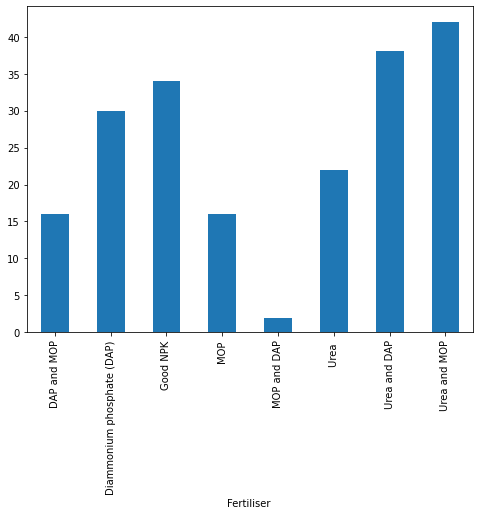

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Fertiliser ').temperature.count().plot.bar(ylim=0)
plt.show()

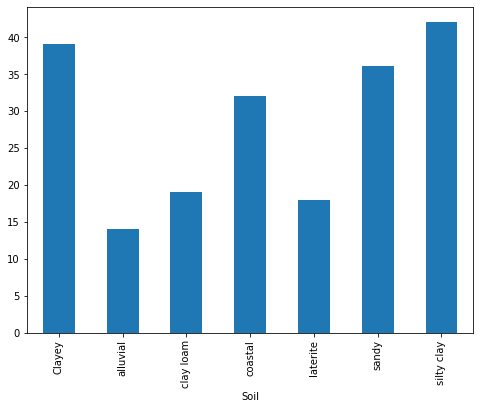

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Soil').temperature.count().plot.bar(ylim=0)
plt.show()

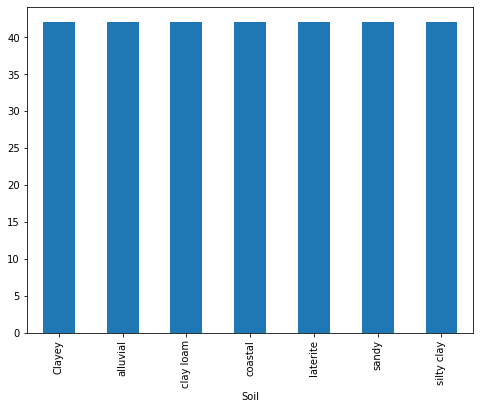

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df2.groupby('Soil').temperature.count().plot.bar(ylim=0)
plt.show()

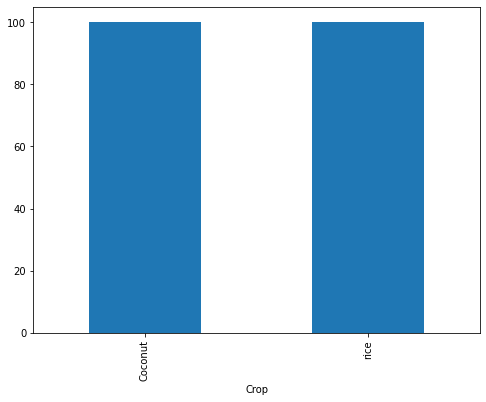

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Crop').temperature.count().plot.bar(ylim=0)
plt.show()

In [20]:
df=df.drop(['Fertiliser ','Soil','Crop'],axis=1)
df

,temperature,humidity,ph,rainfall,N,P,K,encode_id,crop_id
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5,0,0
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2,1,0
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0,2,1
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0,3,0
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5,4,1
...,...,...,...,...,...,...,...,...,...
195,24.635449,80.413630,7.730368,253.720278,2.5,4.0,2.0,5,0
196,20.083696,83.291147,5.739175,263.637218,2.5,4.0,2.0,5,0
197,23.446768,84.793524,6.215110,283.933847,2.5,4.0,2.0,5,0
198,26.800796,80.886848,5.108682,284.436457,2.5,4.0,2.0,5,0


In [21]:
dff=dff.drop(['Soil'],axis=1)
dff

,temperature,humidity,ph,rainfall,N,P,K,soil_id
0,24.873007,82.840226,6.587919,295.609449,4.000000,2.0,2.500000,0
1,28.691648,96.652487,6.081568,178.963546,4.000000,4.0,4.000000,1
2,20.267076,81.638952,5.014507,270.441727,4.000000,4.0,2.000000,2
3,25.070725,95.021568,5.547933,192.903631,2.000000,2.1,3.500000,3
4,25.035124,95.897400,6.182233,174.796583,2.000000,3.9,2.100000,4
...,...,...,...,...,...,...,...,...
289,26.614856,92.024956,5.768959,195.103645,4.000000,4.0,4.000000,5
290,26.857970,94.629560,5.898006,223.756677,3.057435,2.0,2.814188,6
291,25.320920,81.159531,5.991110,182.942080,4.000000,2.0,2.640154,0
292,26.229169,83.836258,5.543360,286.508373,4.200000,2.3,3.200000,2


In [22]:
X=df.iloc[:,:-2]
X

,temperature,humidity,ph,rainfall,N,P,K
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5
...,...,...,...,...,...,...,...
195,24.635449,80.413630,7.730368,253.720278,2.5,4.0,2.0
196,20.083696,83.291147,5.739175,263.637218,2.5,4.0,2.0
197,23.446768,84.793524,6.215110,283.933847,2.5,4.0,2.0
198,26.800796,80.886848,5.108682,284.436457,2.5,4.0,2.0


In [23]:
y1=df[["encode_id"]]
y1

,encode_id
0,0
1,1
2,2
3,3
4,4
...,...
195,5
196,5
197,5
198,5


In [24]:
y3=df[["crop_id"]]
y3

,crop_id
0,0
1,0
2,1
3,0
4,1
...,...
195,0
196,0
197,0
198,0


In [25]:
X1=dff.iloc[:,:-1]
X1

,temperature,humidity,ph,rainfall,N,P,K
0,24.873007,82.840226,6.587919,295.609449,4.000000,2.0,2.500000
1,28.691648,96.652487,6.081568,178.963546,4.000000,4.0,4.000000
2,20.267076,81.638952,5.014507,270.441727,4.000000,4.0,2.000000
3,25.070725,95.021568,5.547933,192.903631,2.000000,2.1,3.500000
4,25.035124,95.897400,6.182233,174.796583,2.000000,3.9,2.100000
...,...,...,...,...,...,...,...
289,26.614856,92.024956,5.768959,195.103645,4.000000,4.0,4.000000
290,26.857970,94.629560,5.898006,223.756677,3.057435,2.0,2.814188
291,25.320920,81.159531,5.991110,182.942080,4.000000,2.0,2.640154
292,26.229169,83.836258,5.543360,286.508373,4.200000,2.3,3.200000


In [26]:
y2=dff[["soil_id"]]
y2

,soil_id
0,0
1,1
2,2
3,3
4,4
...,...
289,5
290,6
291,0
292,2


In [27]:
df_fertiliser = pd.read_csv(r'upsam_X_fertilser.csv')
df_fertiliser = df_fertiliser.drop(['Unnamed: 0'],axis=1)
df_fertiliser

,0,1,2,3,4,5,6
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5
...,...,...,...,...,...,...,...
331,26.312753,97.720481,5.883557,211.297497,4.0,2.0,2.5
332,26.312808,96.677124,5.974667,214.983283,4.0,2.0,2.5
333,26.313541,82.629816,7.201334,264.607128,4.0,2.0,2.5
334,26.312740,97.969962,5.861771,210.416174,4.0,2.0,2.5


In [28]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.1, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y2, test_size=0.1, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.1, random_state=0)

C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

C:\Users\ftr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

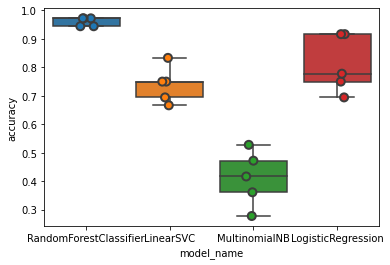

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train1, y_train1, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [30]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.738889
LogisticRegression        0.811111
MultinomialNB             0.411111
RandomForestClassifier    0.961111
Name: accuracy, dtype: float64

C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


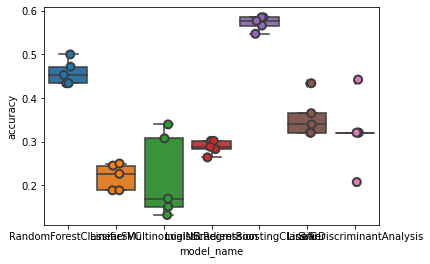

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    GradientBoostingClassifier(n_estimators=300,random_state=1,learning_rate=0.5),
    SVC(kernel='linear'),
    LDA(n_components=1),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train2, y_train2, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [32]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GradientBoostingClassifier    0.571988
LinearDiscriminantAnalysis    0.322424
LinearSVC                     0.219811
LogisticRegression            0.287881
MultinomialNB                 0.220029
RandomForestClassifier        0.458491
SVC                           0.356096
Name: accuracy, dtype: float64

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)


classifier.fit(X_train1,y_train1)

<ipython-input-33-cc26cc932a58>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train1,y_train1)


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [34]:
gbm_classifier = GradientBoostingClassifier(n_estimators=300,random_state=1,learning_rate=0.5)


gbm_classifier.fit(X_train2,y_train2)

C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(learning_rate=0.5, n_estimators=300, random_state=1)

In [35]:

from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)


classifier3.fit(X_train3,y_train3)

<ipython-input-35-b2f158b296a6>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier3.fit(X_train3,y_train3)


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [36]:
#RandomForest Accuracy
### Checking the model accuracy
from sklearn.model_selection import KFold,cross_val_score

print('RF Train_data : ',classifier.score(X_train1,y_train1))
print('RF Validation Data : ',classifier.score(X_test1,y_test1))



rf_pred1 = classifier.predict(X_test1)


print('Accuracy : ',accuracy_score(y_test1, rf_pred1))


# 10-Fold Cross validation
print('10-Fold Cross validation Accuracy : ',np.mean(cross_val_score(classifier, X_train1, y_train1, cv=10)))

RF Train_data :  0.9833333333333333
RF Validation Data :  0.9
Accuracy :  0.9


C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

10-Fold Cross validation Accuracy :  0.9666666666666666


In [37]:
#RandomForest Accuracy
### Checking the model accuracy
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import KFold,cross_val_score

print('GBM Train_data : ',gbm_classifier.score(X_train2,y_train2))
print('GBM Validation Data : ',gbm_classifier.score(X_test2,y_test2))



gbm_pred = gbm_classifier.predict(X_test2)


print('Accuracy : ',accuracy_score(y_test2, gbm_pred))


# 10-Fold Cross validation
print('10-Fold Cross validation Accuracy : ',np.mean(cross_val_score(gbm_classifier, X_train2, y_train2, cv=10)))

GBM Train_data :  0.9962121212121212
GBM Validation Data :  0.5666666666666667
Accuracy :  0.5666666666666667


C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


10-Fold Cross validation Accuracy :  0.601994301994302


In [38]:
#RandomForest Accuracy
### Checking the model accuracy
from sklearn.model_selection import KFold,cross_val_score

print('RF Train_data : ',classifier3.score(X_train3,y_train3))
print('RF Validation Data : ',classifier3.score(X_test3,y_test3))



rf_pred3 = classifier3.predict(X_test3)


print('Accuracy : ',accuracy_score(y_test3, rf_pred3))


# 10-Fold Cross validation
print('10-Fold Cross validation Accuracy : ',np.mean(cross_val_score(classifier3, X_train3, y_train3, cv=10)))

RF Train_data :  0.9333333333333333
RF Validation Data :  0.9
Accuracy :  0.9


C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ftr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

10-Fold Cross validation Accuracy :  0.9222222222222222


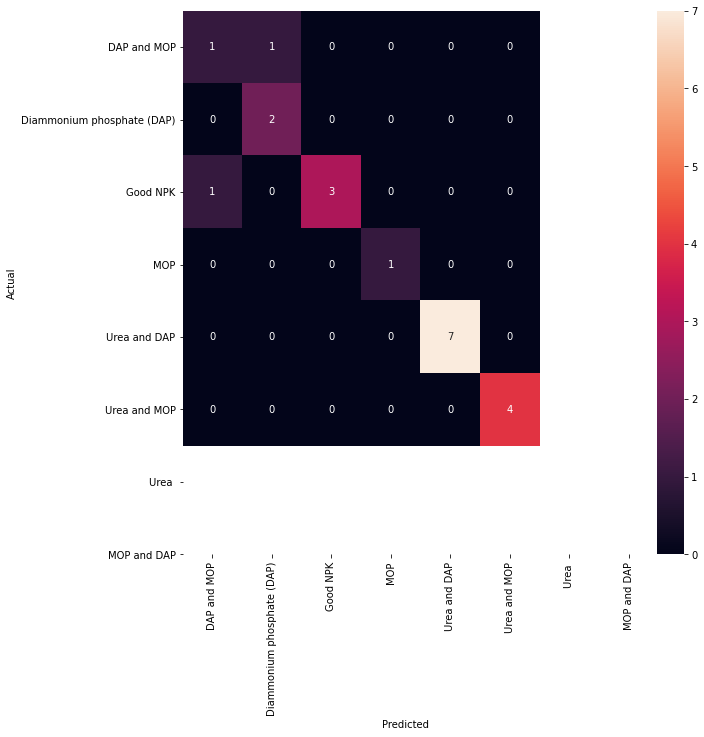

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
conf_mat = confusion_matrix(y_test1, rf_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df['Fertiliser '].values, yticklabels=category_id_df['Fertiliser '].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
print('Classification Report : ')
print(classification_report(y_test1, rf_pred1))


print('Accuracy : ',accuracy_score(y_test1, rf_pred1))

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      1.00      0.80         2
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.86      0.88      0.86        20
weighted avg       0.92      0.90      0.90        20

Accuracy :  0.9


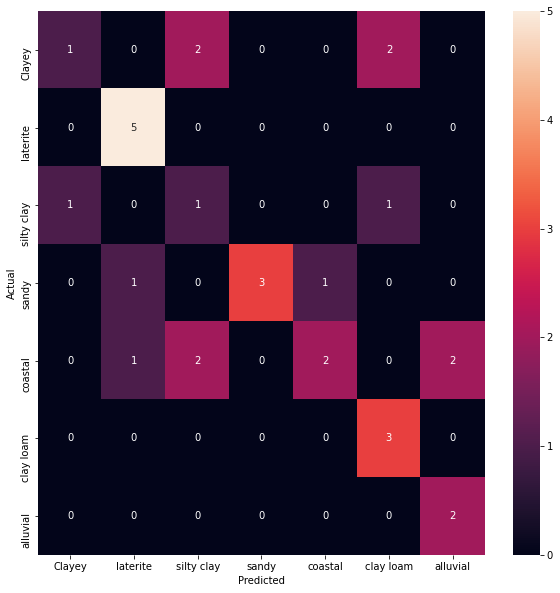

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
conf_mat = confusion_matrix(y_test2, gbm_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=soil_id_df['Soil'].values, yticklabels=soil_id_df['Soil'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix : ')
print(confusion_matrix(y_test2, gbm_pred))

print('Classification Report : ')
print(classification_report(y_test2, gbm_pred))


print('Accuracy : ',accuracy_score(y_test2, gbm_pred))

Confusion Matrix : 
[[1 0 2 0 0 2 0]
 [0 5 0 0 0 0 0]
 [1 0 1 0 0 1 0]
 [0 1 0 3 1 0 0]
 [0 1 2 0 2 0 2]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 2]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.71      1.00      0.83         5
           2       0.20      0.33      0.25         3
           3       1.00      0.60      0.75         5
           4       0.67      0.29      0.40         7
           5       0.50      1.00      0.67         3
           6       0.50      1.00      0.67         2

    accuracy                           0.57        30
   macro avg       0.58      0.63      0.55        30
weighted avg       0.63      0.57      0.54        30

Accuracy :  0.5666666666666667


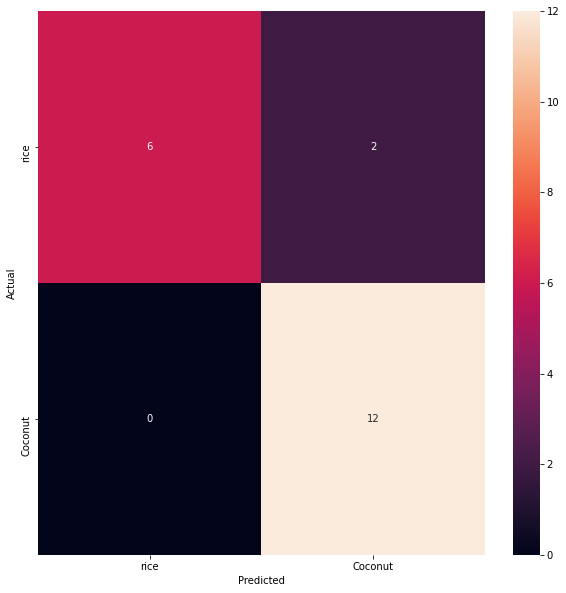

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
conf_mat = confusion_matrix(y_test3, rf_pred3)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=crop_id_df['Crop'].values, yticklabels=crop_id_df['Crop'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
print('Classification Report : ')
print(classification_report(y_test3, rf_pred3))


print('Accuracy : ',accuracy_score(y_test3, rf_pred3))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

Accuracy :  0.9


In [45]:
import pickle


pickle.dump(classifier,open(r"RFClassifier_Fertilser",'wb'))
pickle.dump(gbm_classifier,open(r"GBMClassifier_Soil",'wb'))
pickle.dump(classifier3,open(r"RFClassifier_Crop",'wb'))

In [46]:
loaded_model1 = pickle.load(open(r"RFClassifier_Fertilser",'rb'))
result1 = loaded_model1.score(X_test1, y_test1)
print(result1)

0.9


In [47]:
loaded_model2 = pickle.load(open(r"GBMClassifier_Soil",'rb'))
result2 = loaded_model2.score(X_test2, y_test2)
print(result2)

0.5666666666666667


In [48]:
loaded_model3 = pickle.load(open(r"RFClassifier_Crop",'rb'))
result3 = loaded_model3.score(X_test3, y_test3)
print(result3)

0.9


In [75]:
import pickle
import pandas as pd
# load the model from disk
loaded_model = pickle.load(open(r"RFClassifier_Fertilser",'rb'))
dat=pd.read_csv(r"test_fert_crop_soil.csv")


dat1=dat[['Fertiliser ']]
dat1



dat=dat.drop(['Fertiliser ','Soil','Crop'],axis=1)
dat

,temperature,humidity,ph,rainfall,N,P,K
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5
5,25.517913,94.384206,6.271953,178.729772,2.5,4.0,2.0
6,25.787206,82.111240,6.946636,243.512041,2.2,3.5,3.9
7,21.723831,80.238990,6.501698,277.962619,4.0,2.0,2.5
8,25.035124,95.897400,6.182233,174.796583,2.0,3.9,2.1
9,20.824771,84.134188,6.462392,230.224222,2.5,4.0,3.0


In [76]:
y_pred = loaded_model.predict(dat)
y_pred

array([0, 1, 2, 3, 4, 5, 6, 1, 5, 6, 5, 4, 0, 1, 2, 3, 4, 5, 6, 1, 5, 6,
       5, 4, 6, 6, 4], dtype=int64)

In [77]:
new_dat=pd.read_csv(r"encoded_dict.csv")
new_dat=new_dat.drop(['Unnamed: 0'],axis=1)
new_dat

,Fertiliser,encode_id
0,DAP and MOP,0
1,Diammonium phosphate (DAP),1
2,Good NPK,2
3,MOP,3
4,Urea and DAP,4
5,Urea and MOP,5
6,Urea,6
7,MOP and DAP,7


In [78]:
cat_to_id = dict(new_dat.values)
cat_to_id

{'DAP and MOP': 0,
 'Diammonium phosphate (DAP)': 1,
 'Good NPK': 2,
 'MOP': 3,
 'Urea and DAP': 4,
 'Urea and MOP': 5,
 'Urea ': 6,
 'MOP and DAP': 7}

In [79]:
def get_key(val): 
    for key, value in cat_to_id.items(): 
         if val == value: 
            return key

In [80]:
mi=[]
for i in y_pred:
    k=get_key(i)
    print(k)
    mi.append(k)

DAP and MOP
Diammonium phosphate (DAP)
Good NPK
MOP
Urea and DAP
Urea and MOP
Urea 
Diammonium phosphate (DAP)
Urea and MOP
Urea 
Urea and MOP
Urea and DAP
DAP and MOP
Diammonium phosphate (DAP)
Good NPK
MOP
Urea and DAP
Urea and MOP
Urea 
Diammonium phosphate (DAP)
Urea and MOP
Urea 
Urea and MOP
Urea and DAP
Urea 
Urea 
Urea and DAP


In [81]:
li=dat1['Fertiliser '].values.tolist()
li

['DAP and MOP',
 'Diammonium phosphate (DAP)',
 'Good NPK',
 'MOP',
 'Urea and DAP',
 'Urea and MOP',
 'Urea ',
 'DAP and MOP',
 'Urea and MOP',
 'Urea ',
 'Urea and MOP',
 'Urea and DAP',
 'DAP and MOP',
 'Diammonium phosphate (DAP)',
 'Good NPK',
 'MOP',
 'Urea and DAP',
 'Urea and MOP',
 'Urea ',
 'DAP and MOP',
 'Urea and MOP',
 'Urea ',
 'Urea and MOP',
 'Urea and DAP',
 'Urea ',
 'Urea ',
 'Urea and DAP']

In [82]:
list1=li

In [83]:
print("Accuracy on new set data ",accuracy_score(li, mi))

Accuracy on new set data  0.9259259259259259


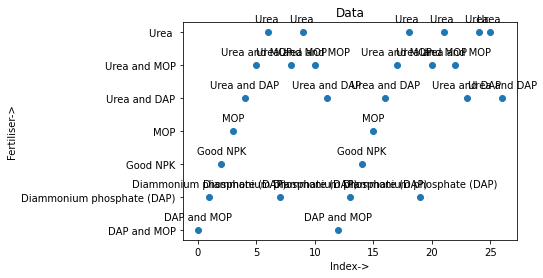

In [84]:
Y=mi
e_dataframe=pd.DataFrame(Y, columns=['Fertiliser']) 

e_dataframe['Index']=e_dataframe.index

ind = e_dataframe["Index"]
elem= e_dataframe["Fertiliser"]

x1=[]
y1=[]

x1=list(ind)
y1=list(elem)

from matplotlib import pyplot as plt
#colors = np.where(y1=1, 'r', 'k')
plt.scatter(x1,y1)
plt.xlabel('Index->')
plt.ylabel('Fertiliser->')
plt.title('Data')


for x,y in zip(x1,y1):

    label = y

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [85]:
import pickle
import pandas as pd
# load the model from disk
loaded_model = pickle.load(open(r"GBMClassifier_Soil",'rb'))
dat=pd.read_csv(r"test_fert_crop_soil.csv")


dat2=dat[['Soil']]
dat2



dat=dat.drop(['Fertiliser ','Soil','Crop'],axis=1)
dat

,temperature,humidity,ph,rainfall,N,P,K
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5
5,25.517913,94.384206,6.271953,178.729772,2.5,4.0,2.0
6,25.787206,82.111240,6.946636,243.512041,2.2,3.5,3.9
7,21.723831,80.238990,6.501698,277.962619,4.0,2.0,2.5
8,25.035124,95.897400,6.182233,174.796583,2.0,3.9,2.1
9,20.824771,84.134188,6.462392,230.224222,2.5,4.0,3.0


In [86]:
y_pred = loaded_model.predict(dat)
y_pred

array([0, 0, 1, 2, 3, 3, 5, 0, 4, 5, 6, 1, 0, 0, 1, 2, 3, 3, 5, 0, 4, 5,
       6, 1, 5, 5, 1], dtype=int64)

In [87]:
new_dat=pd.read_csv(r"encoded_dict_soil.csv")
new_dat=new_dat.drop(['Unnamed: 0'],axis=1)
new_dat

,Soil,soil_id
0,Clayey,0
1,laterite,1
2,silty clay,2
3,sandy,3
4,coastal,4
5,clay loam,5
6,alluvial,6


In [88]:
cat_to_id = dict(new_dat.values)
cat_to_id

{'Clayey': 0,
 'laterite': 1,
 'silty clay': 2,
 'sandy': 3,
 'coastal': 4,
 'clay loam': 5,
 'alluvial': 6}

In [89]:
mi=[]
for i in y_pred:
    k=get_key(i)
    print(k)
    mi.append(k)

Clayey
Clayey
laterite
silty clay
sandy
sandy
clay loam
Clayey
coastal
clay loam
alluvial
laterite
Clayey
Clayey
laterite
silty clay
sandy
sandy
clay loam
Clayey
coastal
clay loam
alluvial
laterite
clay loam
clay loam
laterite


In [90]:
li=dat2['Soil'].values.tolist()
li

['Clayey',
 'Clayey',
 'laterite',
 'silty clay',
 'sandy',
 'sandy',
 'Clayey',
 'Clayey',
 'coastal',
 'clay loam',
 'alluvial',
 'laterite',
 'Clayey',
 'Clayey',
 'laterite',
 'silty clay',
 'sandy',
 'sandy',
 'Clayey',
 'Clayey',
 'coastal',
 'clay loam',
 'alluvial',
 'laterite',
 'clay loam',
 'clay loam',
 'laterite']

In [91]:
list2=li
print("Accuracy on new set data ",accuracy_score(li, mi))

Accuracy on new set data  0.9259259259259259


Scatter Plot Of Soil

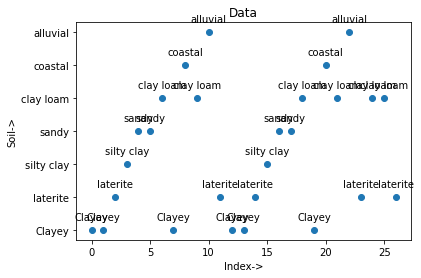

In [92]:
Y=mi
e_dataframe=pd.DataFrame(Y, columns=['Soil']) 

e_dataframe['Index']=e_dataframe.index

ind = e_dataframe["Index"]
elem= e_dataframe["Soil"]

x1=[]
y1=[]

x1=list(ind)
y1=list(elem)

from matplotlib import pyplot as plt
#colors = np.where(y1=1, 'r', 'k')
plt.scatter(x1,y1)
plt.xlabel('Index->')
plt.ylabel('Soil->')
plt.title('Data')


for x,y in zip(x1,y1):

    label = y

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# CROP

In [93]:
import pickle
import pandas as pd
# load the model from disk
loaded_model = pickle.load(open(r"RFClassifier_Crop",'rb'))
dat=pd.read_csv(r"test_fert_crop_soil.csv")


dat3=dat[['Crop']]
dat3



dat=dat.drop(['Fertiliser ','Soil','Crop'],axis=1)
dat

,temperature,humidity,ph,rainfall,N,P,K
0,24.873007,82.840226,6.587919,295.609449,4.0,2.0,2.5
1,26.491096,80.158363,6.980401,242.864034,4.2,2.3,3.2
2,28.691648,96.652487,6.081568,178.963546,4.0,4.0,4.0
3,20.267076,81.638952,5.014507,270.441727,4.0,4.0,2.0
4,25.070725,95.021568,5.547933,192.903631,2.0,2.1,3.5
5,25.517913,94.384206,6.271953,178.729772,2.5,4.0,2.0
6,25.787206,82.111240,6.946636,243.512041,2.2,3.5,3.9
7,21.723831,80.238990,6.501698,277.962619,4.0,2.0,2.5
8,25.035124,95.897400,6.182233,174.796583,2.0,3.9,2.1
9,20.824771,84.134188,6.462392,230.224222,2.5,4.0,3.0


In [94]:
y_pred = loaded_model.predict(dat)
y_pred
new_dat=pd.read_csv(r"encoded_dict_crop.csv")
new_dat=new_dat.drop(['Unnamed: 0'],axis=1)
new_dat

,Crop,crop_id
0,rice,0
1,Coconut,1


In [95]:
cat_to_id = dict(new_dat.values)
cat_to_id

{'rice': 0, 'Coconut': 1}

In [96]:
mi=[]
for i in y_pred:
    k=get_key(i)
    print(k)
    mi.append(k)

rice
rice
Coconut
rice
Coconut
Coconut
rice
rice
Coconut
rice
Coconut
Coconut
rice
rice
Coconut
rice
Coconut
Coconut
rice
rice
Coconut
rice
Coconut
Coconut
rice
rice
Coconut


In [97]:
li=dat3['Crop'].values.tolist()
li
list3=li

In [98]:
print("Accuracy on new set data ",accuracy_score(li, mi))

Accuracy on new set data  1.0


Scatter Plot Of Crop

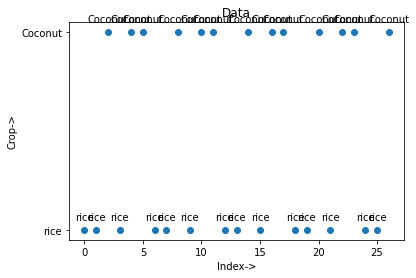

In [99]:
Y=mi
e_dataframe=pd.DataFrame(Y, columns=['Crop']) 

e_dataframe['Index']=e_dataframe.index

ind = e_dataframe["Index"]
elem= e_dataframe["Crop"]

x1=[]
y1=[]

x1=list(ind)
y1=list(elem)

from matplotlib import pyplot as plt
#colors = np.where(y1=1, 'r', 'k')
plt.scatter(x1,y1)
plt.xlabel('Index->')
plt.ylabel('Crop->')
plt.title('Data')


for x,y in zip(x1,y1):

    label = y

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# FINAL OUTPUT

In [100]:
print("The Given Dataset contain : ")
print("Fertiliser | Soil | Crop")
print("---------- | ---- | ----")
length=len(list1)
i=0
while length > i:
    print(list1[i] +" | "+ list2[i] +" | "+ list3[i])
    i = i + 1


The Given Dataset contain : 
Fertiliser | Soil | Crop
---------- | ---- | ----
DAP and MOP | Clayey | rice
Diammonium phosphate (DAP) | Clayey | rice
Good NPK | laterite | Coconut
MOP | silty clay | rice
Urea and DAP | sandy | Coconut
Urea and MOP | sandy | Coconut
Urea  | Clayey | rice
DAP and MOP | Clayey | rice
Urea and MOP | coastal | Coconut
Urea  | clay loam | rice
Urea and MOP | alluvial | Coconut
Urea and DAP | laterite | Coconut
DAP and MOP | Clayey | rice
Diammonium phosphate (DAP) | Clayey | rice
Good NPK | laterite | Coconut
MOP | silty clay | rice
Urea and DAP | sandy | Coconut
Urea and MOP | sandy | Coconut
Urea  | Clayey | rice
DAP and MOP | Clayey | rice
Urea and MOP | coastal | Coconut
Urea  | clay loam | rice
Urea and MOP | alluvial | Coconut
Urea and DAP | laterite | Coconut
Urea  | clay loam | rice
Urea  | clay loam | rice
Urea and DAP | laterite | Coconut
